In [1]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../python/")
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import math

In [2]:
with open(r'../../results/outcomes/Cost/Analyze result/ npv_cost.csv') as cost:
    df_cost=pd.read_csv(cost)
df_cost

,Strategy,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,total_cost_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br,total_cost_br,total
0,I_NN,1570000.0,0.0000,1.661640e+05,1730000.0,8.480912e+05,0.0000,1.661640e+05,1010000.0,2740000.0
1,I_NC,1570000.0,0.0000,1.661640e+05,1730000.0,5.730000e+06,314891.7243,1.590000e+06,7640000.0,9370000.0
2,I_NA,1570000.0,0.0000,1.661640e+05,1730000.0,1.350000e+07,933516.8186,4.430000e+06,18800000.0,20500000.0
3,I_CN,13300000.0,314891.7243,1.590000e+06,15200000.0,8.480912e+05,0.0000,1.661640e+05,1010000.0,16200000.0
4,I_AN,1570000.0,0.0000,1.661640e+05,1730000.0,1.350000e+07,933516.8186,4.430000e+06,18800000.0,20500000.0
5,J_CC,13600000.0,314891.7243,1.590000e+06,15500000.0,1.940000e+06,314891.7243,1.590000e+06,3840000.0,19300000.0
6,I_CC,13300000.0,314891.7243,1.590000e+06,15200000.0,5.730000e+06,314891.7243,1.590000e+06,7640000.0,22800000.0
7,J_AA,32200000.0,933516.8186,4.430000e+06,37500000.0,4.550000e+06,933516.8186,4.430000e+06,9920000.0,47400000.0
8,I_AA,31500000.0,933516.8186,4.430000e+06,36900000.0,1.350000e+07,933516.8186,4.430000e+06,18800000.0,55700000.0


In [3]:
df_cost = df_cost.set_index('Strategy')

In [4]:
df_cost=df_cost.drop(['total_cost_el', 'total_cost_br', 'total'], axis=1)

In [5]:
df_cost

,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br
Strategy,,,,,,
I_NN,1570000.0,0.0000,1.661640e+05,8.480912e+05,0.0000,1.661640e+05
I_NC,1570000.0,0.0000,1.661640e+05,5.730000e+06,314891.7243,1.590000e+06
I_NA,1570000.0,0.0000,1.661640e+05,1.350000e+07,933516.8186,4.430000e+06
I_CN,13300000.0,314891.7243,1.590000e+06,8.480912e+05,0.0000,1.661640e+05
I_AN,1570000.0,0.0000,1.661640e+05,1.350000e+07,933516.8186,4.430000e+06
J_CC,13600000.0,314891.7243,1.590000e+06,1.940000e+06,314891.7243,1.590000e+06
I_CC,13300000.0,314891.7243,1.590000e+06,5.730000e+06,314891.7243,1.590000e+06
J_AA,32200000.0,933516.8186,4.430000e+06,4.550000e+06,933516.8186,4.430000e+06
I_AA,31500000.0,933516.8186,4.430000e+06,1.350000e+07,933516.8186,4.430000e+06


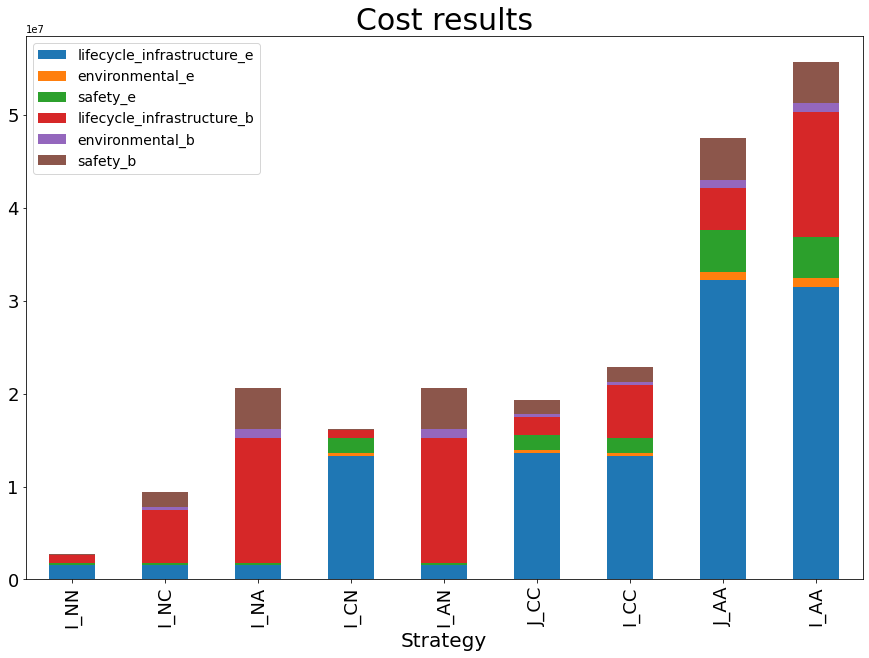

In [6]:
# plotting cost results
df_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle_infrastructure_e','environmental_e','safety_e','lifecycle_infrastructure_b', 'environmental_b','safety_b',], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost.png')

In [7]:
with open(r'../../results/outcomes/Benefit/Analyze result/ npv_benefit.csv') as loss_benefit:
    df_loss_benefit=pd.read_csv(loss_benefit)
df_loss_benefit

,Strategy,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
0,I_NN,0.000000,1.190000e+09,0.000000,2620000.0
1,I_NC,0.000000,1.190000e+09,1020.823948,1910000.0
2,I_NA,0.000000,1.190000e+09,2220.392903,1250000.0
3,I_CN,1020.823948,8.650000e+08,0.000000,2620000.0
4,I_AN,2220.392903,5.670000e+08,0.000000,2620000.0
5,J_CC,1020.823948,8.650000e+08,1020.823948,1910000.0
6,I_CC,1020.823948,8.650000e+08,1020.823948,1910000.0
7,J_AA,2220.392903,5.670000e+08,2220.392903,1250000.0
8,I_AA,2220.392903,5.670000e+08,2220.392903,1250000.0


In [8]:
df_loss_benefit = df_loss_benefit.set_index('Strategy')

In [9]:
df_loss_benefit

,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
Strategy,,,,
I_NN,0.000000,1.190000e+09,0.000000,2620000.0
I_NC,0.000000,1.190000e+09,1020.823948,1910000.0
I_NA,0.000000,1.190000e+09,2220.392903,1250000.0
I_CN,1020.823948,8.650000e+08,0.000000,2620000.0
I_AN,2220.392903,5.670000e+08,0.000000,2620000.0
J_CC,1020.823948,8.650000e+08,1020.823948,1910000.0
I_CC,1020.823948,8.650000e+08,1020.823948,1910000.0
J_AA,2220.392903,5.670000e+08,2220.392903,1250000.0
I_AA,2220.392903,5.670000e+08,2220.392903,1250000.0


In [10]:
df_loss=df_loss_benefit.drop(['aesthetic_benefit_el', 'aesthetic_benefit_br'], axis=1)

In [11]:
df_loss

,economic_losses_el,economic_loss_br
Strategy,,
I_NN,1.190000e+09,2620000.0
I_NC,1.190000e+09,1910000.0
I_NA,1.190000e+09,1250000.0
I_CN,8.650000e+08,2620000.0
I_AN,5.670000e+08,2620000.0
J_CC,8.650000e+08,1910000.0
I_CC,8.650000e+08,1910000.0
J_AA,5.670000e+08,1250000.0
I_AA,5.670000e+08,1250000.0


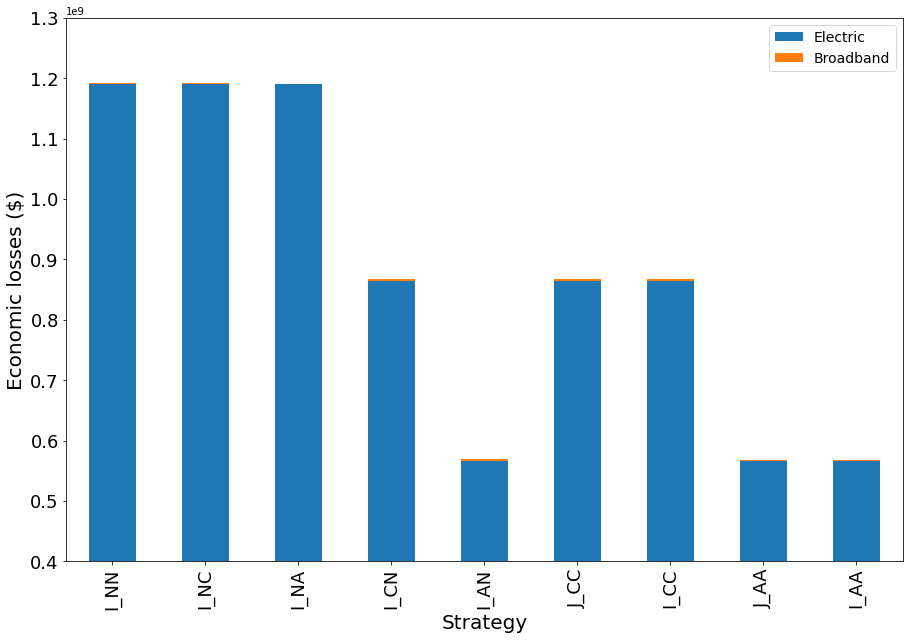

In [12]:
# plotting loss results
df_loss.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.ylim([400000000, 1300000000])
plt.grid()
#plt.title("loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.ylabel('Economic losses ($)',fontsize=20)
plt.legend(['Electric','Broadband'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-loss.png', dpi=300)

In [13]:
df_benefit=df_loss_benefit.drop(['economic_losses_el', 'economic_loss_br'], axis=1)

In [14]:
df_benefit

,aesthetic_benefit_el,aesthetic_benefit_br
Strategy,,
I_NN,0.000000,0.000000
I_NC,0.000000,1020.823948
I_NA,0.000000,2220.392903
I_CN,1020.823948,0.000000
I_AN,2220.392903,0.000000
J_CC,1020.823948,1020.823948
I_CC,1020.823948,1020.823948
J_AA,2220.392903,2220.392903
I_AA,2220.392903,2220.392903


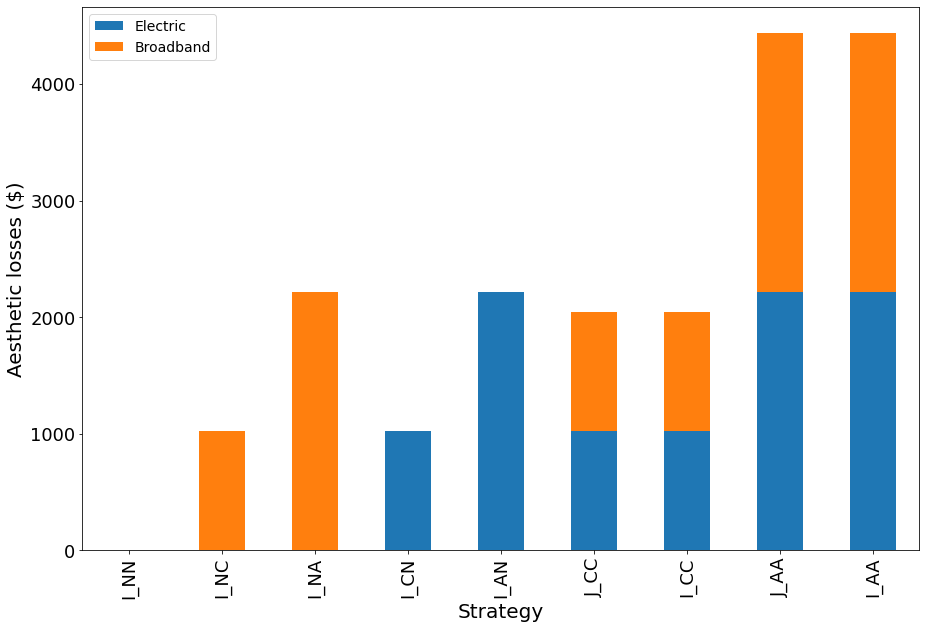

In [16]:
# plotting benefit results
#color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
df_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.ylabel('Aesthetic losses ($)',fontsize=20)
plt.legend(['Electric','Broadband'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-benefit.png', dpi=300)
color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']


In [116]:
with open(r'../../results/outcomes/npv_cost_loss_benefit.csv') as npv_cost_loss_benefit:
    df_npv_cost_loss_benefit=pd.read_csv(npv_cost_loss_benefit)
df_npv_cost_loss_benefit

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
0,I_NN,2420000.0,0.0,332000.0,2750000.0,0.0,1.190000e+09,-1.190000e+09
1,I_NC,7300000.0,315000.0,1760000.0,9380000.0,1020.0,1.190000e+09,-1.200000e+09
2,I_NA,15100000.0,934000.0,4600000.0,20600000.0,2220.0,1.190000e+09,-1.210000e+09
3,I_CN,14100000.0,315000.0,1760000.0,16200000.0,1020.0,8.680000e+08,-8.840000e+08
4,I_AN,15100000.0,934000.0,4600000.0,20600000.0,2220.0,5.700000e+08,-5.910000e+08
5,J_CC,15500000.0,630000.0,3180000.0,19300000.0,2040.0,8.670000e+08,-8.860000e+08
6,I_CC,19000000.0,630000.0,3180000.0,22800000.0,2040.0,8.670000e+08,-8.900000e+08
7,J_AA,36800000.0,1870000.0,8860000.0,47500000.0,4440.0,5.680000e+08,-6.160000e+08
8,I_AA,45000000.0,1870000.0,8860000.0,55700000.0,4440.0,5.680000e+08,-6.240000e+08


In [117]:
df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [118]:
df_npv_cost_loss_benefit

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
Strategy,,,,,,,
I_NN,2420000.0,0.0,332000.0,2750000.0,0.0,1.190000e+09,-1.190000e+09
I_NC,7300000.0,315000.0,1760000.0,9380000.0,1020.0,1.190000e+09,-1.200000e+09
I_NA,15100000.0,934000.0,4600000.0,20600000.0,2220.0,1.190000e+09,-1.210000e+09
I_CN,14100000.0,315000.0,1760000.0,16200000.0,1020.0,8.680000e+08,-8.840000e+08
I_AN,15100000.0,934000.0,4600000.0,20600000.0,2220.0,5.700000e+08,-5.910000e+08
J_CC,15500000.0,630000.0,3180000.0,19300000.0,2040.0,8.670000e+08,-8.860000e+08
I_CC,19000000.0,630000.0,3180000.0,22800000.0,2040.0,8.670000e+08,-8.900000e+08
J_AA,36800000.0,1870000.0,8860000.0,47500000.0,4440.0,5.680000e+08,-6.160000e+08
I_AA,45000000.0,1870000.0,8860000.0,55700000.0,4440.0,5.680000e+08,-6.240000e+08


In [119]:
df_npv_net_benefit=df_npv_cost_loss_benefit.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','economic_losses'], axis=1)

In [120]:
df_npv_net_benefit

,net_benefit
Strategy,
I_NN,-1.190000e+09
I_NC,-1.200000e+09
I_NA,-1.210000e+09
I_CN,-8.840000e+08
I_AN,-5.910000e+08
J_CC,-8.860000e+08
I_CC,-8.900000e+08
J_AA,-6.160000e+08
I_AA,-6.240000e+08


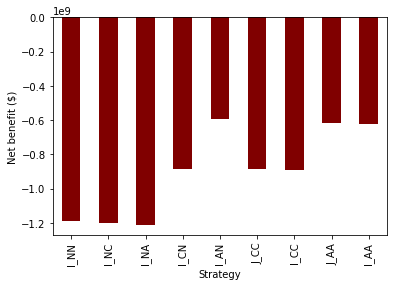

In [121]:
# plotting graph
df_npv_net_benefit.plot(ylabel='Net benefit ($)', kind="bar", color="maroon", legend=False)
plt.savefig(r'../../figures/npv.png', dpi=300, bbox_inches='tight')

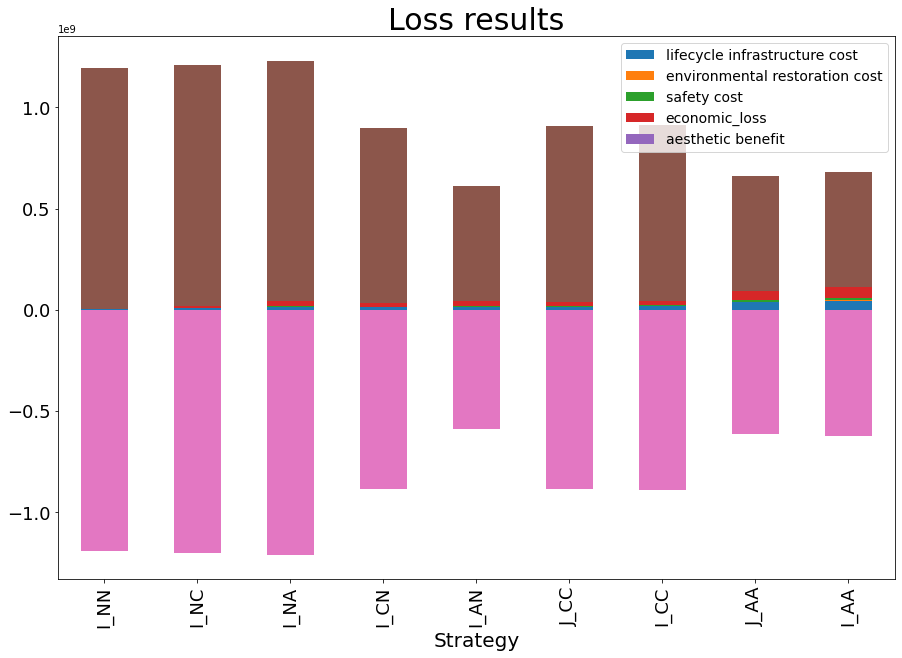

In [122]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated.png', dpi=300)

In [123]:
df_npv_cost_loss_benefit

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
Strategy,,,,,,,
I_NN,2420000.0,0.0,332000.0,2750000.0,0.0,1.190000e+09,-1.190000e+09
I_NC,7300000.0,315000.0,1760000.0,9380000.0,1020.0,1.190000e+09,-1.200000e+09
I_NA,15100000.0,934000.0,4600000.0,20600000.0,2220.0,1.190000e+09,-1.210000e+09
I_CN,14100000.0,315000.0,1760000.0,16200000.0,1020.0,8.680000e+08,-8.840000e+08
I_AN,15100000.0,934000.0,4600000.0,20600000.0,2220.0,5.700000e+08,-5.910000e+08
J_CC,15500000.0,630000.0,3180000.0,19300000.0,2040.0,8.670000e+08,-8.860000e+08
I_CC,19000000.0,630000.0,3180000.0,22800000.0,2040.0,8.670000e+08,-8.900000e+08
J_AA,36800000.0,1870000.0,8860000.0,47500000.0,4440.0,5.680000e+08,-6.160000e+08
I_AA,45000000.0,1870000.0,8860000.0,55700000.0,4440.0,5.680000e+08,-6.240000e+08


In [124]:
df_npv_cost=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','economic_losses', 'aesthetic_benefit'], axis=1)

In [125]:
df_npv_cost

,lifecycle_infrastructure,environmental_restoration,safety
Strategy,,,
I_NN,2420000.0,0.0,332000.0
I_NC,7300000.0,315000.0,1760000.0
I_NA,15100000.0,934000.0,4600000.0
I_CN,14100000.0,315000.0,1760000.0
I_AN,15100000.0,934000.0,4600000.0
J_CC,15500000.0,630000.0,3180000.0
I_CC,19000000.0,630000.0,3180000.0
J_AA,36800000.0,1870000.0,8860000.0
I_AA,45000000.0,1870000.0,8860000.0


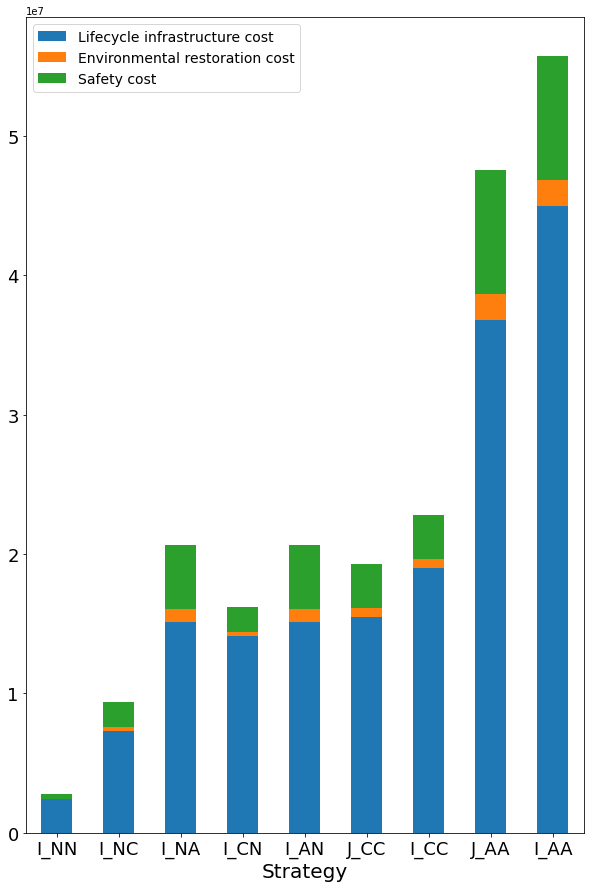

In [149]:
# plotting cost results integerated for broadband and electric
df_npv_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Lifecycle infrastructure cost','Environmental restoration cost','Safety cost'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation = 0)
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=300)

In [127]:
df_npv_loss=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

In [167]:
df_npv_loss

,economic_losses
Strategy,
I_NN,1.190000e+09
I_NC,1.190000e+09
I_NA,1.190000e+09
I_CN,8.680000e+08
I_AN,5.700000e+08
J_CC,8.670000e+08
I_CC,8.670000e+08
J_AA,5.680000e+08
I_AA,5.680000e+08


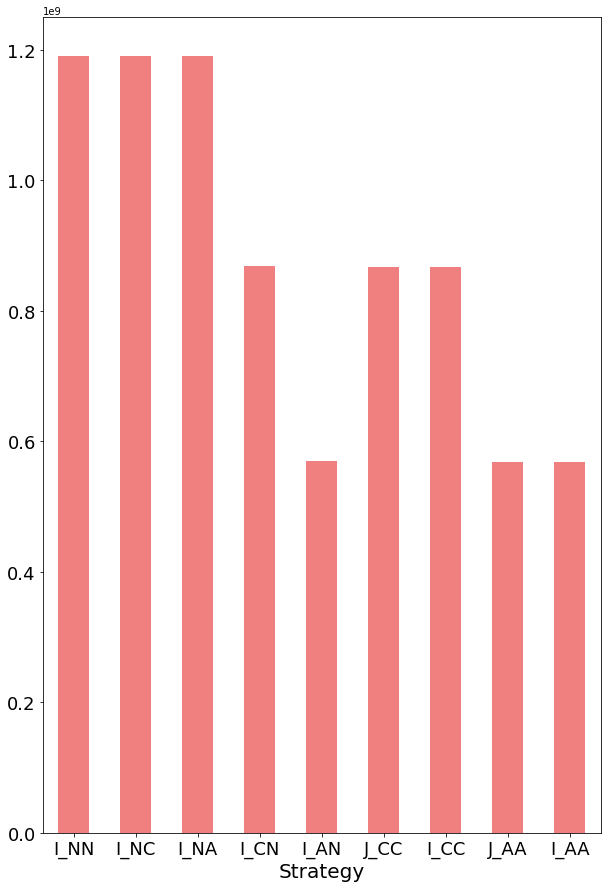

In [170]:
# plotting loss results integerated for broadband and electric
df_npv_loss.plot.bar(stacked=True, color='lightcoral', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=300)

In [130]:
df_npv_benefit=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','lifecycle_infrastructure','environmental_restoration','safety', 'economic_losses'], axis=1)

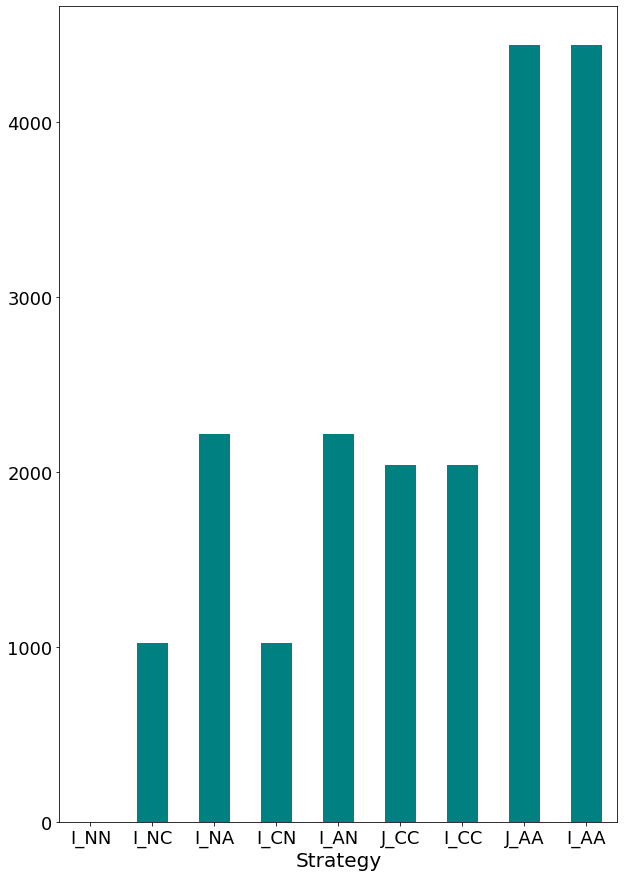

In [181]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit.plot.bar(stacked=True, color='teal', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=300)

In [132]:
with open(r'../../results/outcomes/npv_cost_loss_benefit_relative.csv') as npv_cost_loss_benefit_relative:
    df_npv_cost_loss_benefit_relative=pd.read_csv(npv_cost_loss_benefit_relative)
df_npv_cost_loss_benefit_relative

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
0,I_NN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,I_NC,4880000.0,315000.0,1430000.0,6630000.0,1020.0,0.0,-6620000.0
2,I_NA,12700000.0,934000.0,4270000.0,17900000.0,2220.0,0.0,-17900000.0
3,I_CN,11700000.0,315000.0,1430000.0,13400000.0,1020.0,-322000000.0,309000000.0
4,I_AN,12700000.0,934000.0,4270000.0,17900000.0,2220.0,-620000000.0,602000000.0
5,J_CC,13100000.0,630000.0,2850000.0,16600000.0,2040.0,-323000000.0,306000000.0
6,I_CC,16600000.0,630000.0,2850000.0,20100000.0,2040.0,-323000000.0,303000000.0
7,J_AA,34400000.0,1870000.0,8530000.0,44800000.0,4440.0,-622000000.0,577000000.0
8,I_AA,42600000.0,1870000.0,8530000.0,53000000.0,4440.0,-622000000.0,569000000.0


In [133]:
df_npv_cost_loss_benefit_relative = df_npv_cost_loss_benefit_relative.set_index('Strategy')

In [134]:
df_npv_net_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','economic_losses'], axis=1)

In [135]:
df_npv_net_benefit_relative

,net_benefit
Strategy,
I_NN,0.0
I_NC,-6620000.0
I_NA,-17900000.0
I_CN,309000000.0
I_AN,602000000.0
J_CC,306000000.0
I_CC,303000000.0
J_AA,577000000.0
I_AA,569000000.0


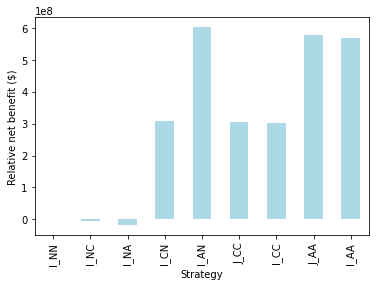

In [136]:
# plotting graph
df_npv_net_benefit_relative.plot(ylabel='Relative net benefit ($)', kind="bar", color="lightblue", legend=False)
plt.savefig(r'../../figures/relative-npv.png', dpi=300, bbox_inches='tight')

In [137]:
df_npv_cost_loss_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['net_benefit', 'total_cost'], axis=1)

In [138]:
df_npv_cost_loss_benefit_relative

,lifecycle_infrastructure,environmental_restoration,safety,aesthetic_benefit,economic_losses
Strategy,,,,,
I_NN,0.0,0.0,0.0,0.0,0.0
I_NC,4880000.0,315000.0,1430000.0,1020.0,0.0
I_NA,12700000.0,934000.0,4270000.0,2220.0,0.0
I_CN,11700000.0,315000.0,1430000.0,1020.0,-322000000.0
I_AN,12700000.0,934000.0,4270000.0,2220.0,-620000000.0
J_CC,13100000.0,630000.0,2850000.0,2040.0,-323000000.0
I_CC,16600000.0,630000.0,2850000.0,2040.0,-323000000.0
J_AA,34400000.0,1870000.0,8530000.0,4440.0,-622000000.0
I_AA,42600000.0,1870000.0,8530000.0,4440.0,-622000000.0


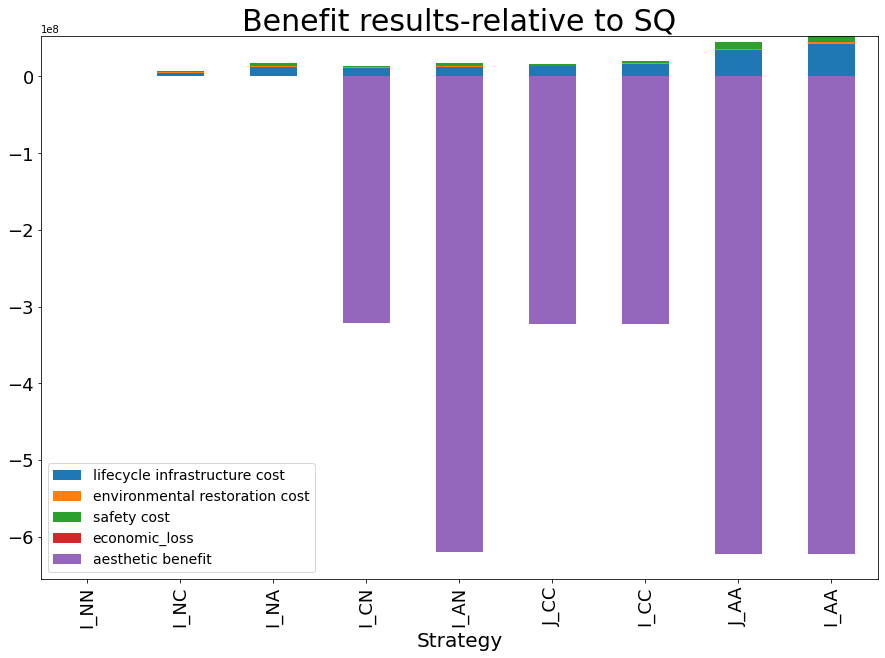

In [139]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results-relative to SQ", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated-relative.png', dpi=300)

In [140]:
df_npv_cost_relative=df_npv_cost_loss_benefit_relative.drop(['economic_losses', 'aesthetic_benefit'], axis=1)

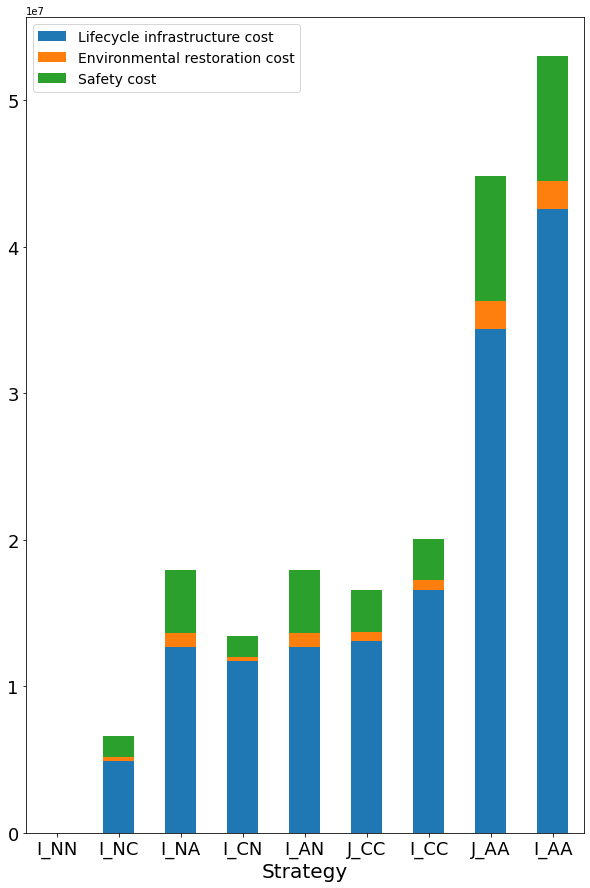

In [177]:
# plotting cost results integerated for broadband and electric
df_npv_cost_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Cost results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Lifecycle infrastructure cost','Environmental restoration cost','Safety cost'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=300)

In [142]:
df_npv_loss_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

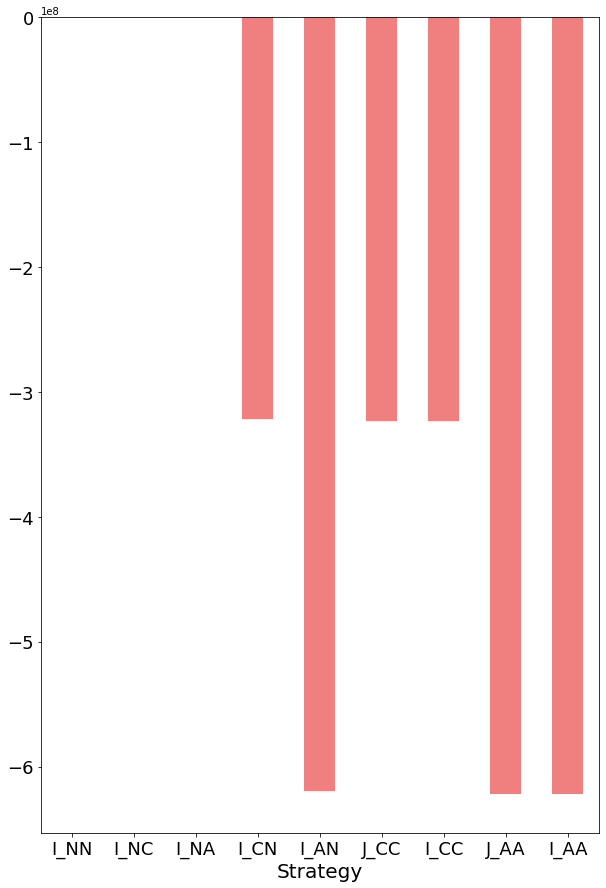

In [179]:
# plotting loss results integerated for broadband and electric
df_npv_loss_relative.plot.bar(stacked=True, color='lightcoral', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Losses results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=300)

In [144]:
df_npv_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'economic_losses'], axis=1)

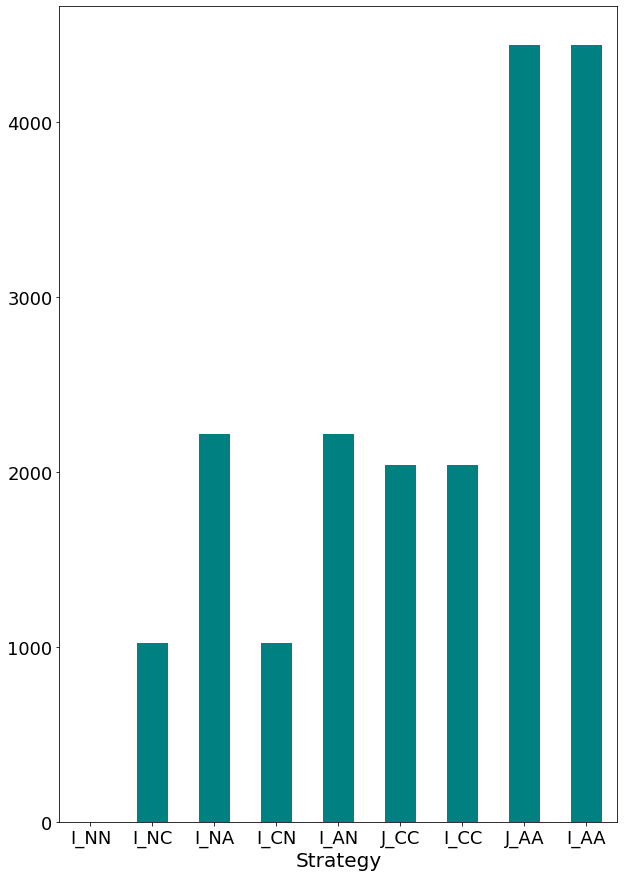

In [180]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit_relative.plot.bar(stacked=True, color='teal', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results- relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=300)